In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [ ]:
df = pd.read_csv('/content/twitter_training1.csv')

In [ ]:
df

,number,company,emotions,comments
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
46289,11943,Verizon,Neutral,some stocks play at peak interesting looking i...
46290,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...
46291,11944,Verizon,Neutral,The last 3 August's I've broken my phone. This...
46292,11944,Verizon,Neutral,The last time I broke my phone was on August 3...


In [ ]:
df['comments'] = df['comments'].str.replace("[^a-zA-Z#]"," ")
df.head()

,number,company,emotions,comments
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.describe()

,number
count,46294.000000
mean,6093.019657
std,4090.821356
min,1.000000
25%,1986.250000
50%,5590.000000
75%,9558.000000
max,13200.000000


In [ ]:
df['comments'] = df['comments'].astype(str)

In [ ]:
df['comments'] = df['comments'].fillna('')

In [ ]:
tokenized_tweet = df['comments'].apply(lambda x: x.split())
tokenized_tweet.head()

,comments
0,"[im, getting, on, borderlands, and, i, will, m..."
1,"[I, am, coming, to, the, borders, and, I, will..."
2,"[im, getting, on, borderlands, and, i, will, k..."
3,"[im, coming, on, borderlands, and, i, will, mu..."
4,"[im, getting, on, borderlands, 2, and, i, will..."


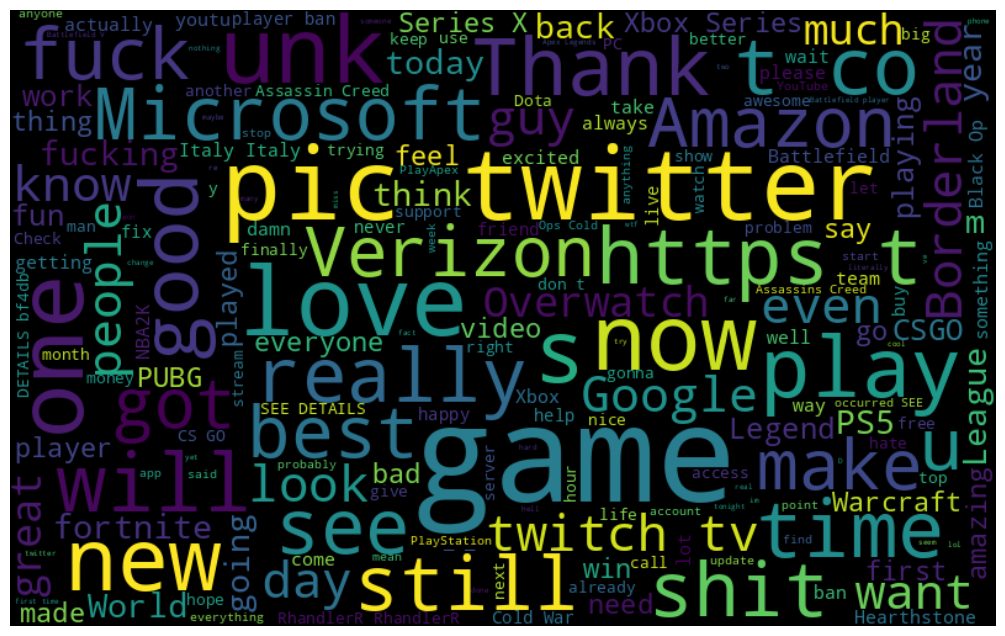

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['comments']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46294 entries, 0 to 46293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    46294 non-null  int64 
 1   company   46294 non-null  object
 2   emotions  46294 non-null  object
 3   comments  46294 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Sentiment analysis')

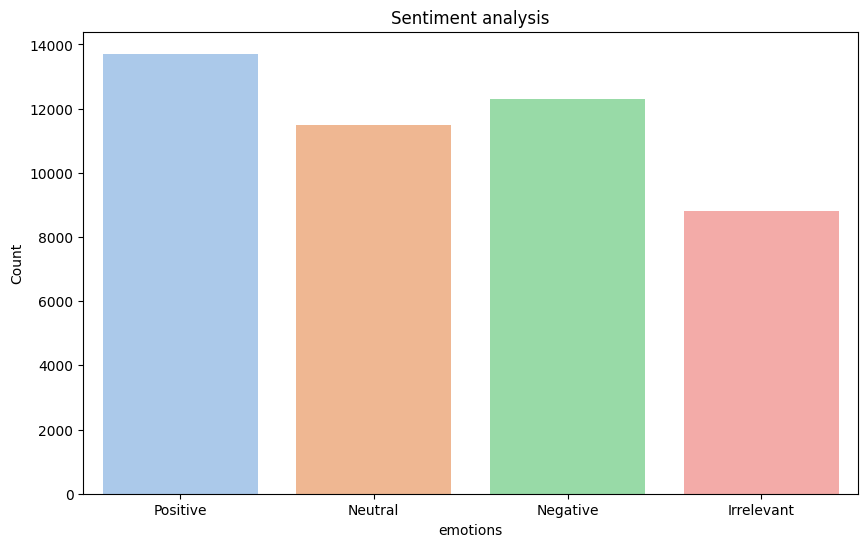

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotions', data=df, palette= 'pastel', legend=False, hue='emotions')
plt.xlabel('emotions')
plt.ylabel('Count')
plt.title('Sentiment analysis')

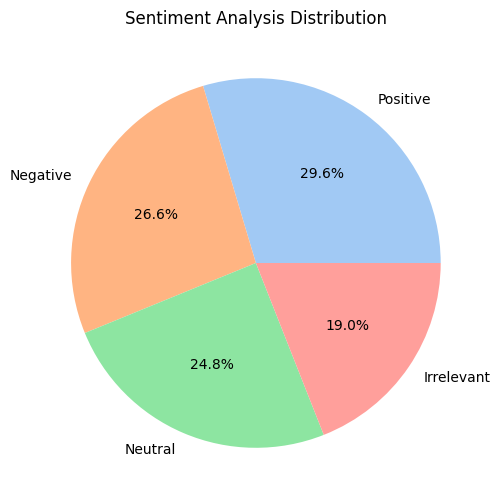

In [ ]:
emotion_count = df['emotions'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(emotion_count, labels=emotion_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Analysis Distribution')
plt.show()